Tensorflow based hand writing detection

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [4]:
tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

normalise the data between 0 to 1

In [5]:
import tensorflow as tf

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

Reshape the data to include channel dimension

In [6]:
# Reshape the data to include the channel dimension (28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [7]:
# Step 2: Build the CNN model with Convolutional and MaxPooling layers
model = models.Sequential()

In [8]:
# First convolutional layer followed by MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Second convolutional layer followed by MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [10]:
# Third convolutional layer (no MaxPooling here, as it's typically not added after every layer)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
# Flatten the feature maps before feeding into fully connected layers
model.add(layers.Flatten())

In [12]:
# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

In [13]:
# Output layer with 10 units (one for each digit class)
model.add(layers.Dense(10, activation='softmax'))

Set the loss function to 'categorical_crossentropy', Track accuracy as the metric.

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
x = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.8937 - loss: 0.3376 - val_accuracy: 0.9803 - val_loss: 0.0592
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9863 - loss: 0.0455 - val_accuracy: 0.9903 - val_loss: 0.0332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 39ms/step - accuracy: 0.9892 - loss: 0.0329 - val_accuracy: 0.9888 - val_loss: 0.0373
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9876 - val_loss: 0.0398
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9947 - loss: 0.0180 - val_accuracy: 0.9896 - val_loss: 0.0325
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9879 - loss: 0.0373
Test accuracy: 0.9896


In [16]:
# You can access the history object using `x.history`
history_dict = x.history

# Access training and validation accuracy
train_acc = history_dict['accuracy']        # Training accuracy for each epoch
val_acc = history_dict['val_accuracy']      # Validation accuracy for each epoch

# Access training and validation loss
train_loss = history_dict['loss']           # Training loss for each epoch
val_loss = history_dict['val_loss']         # Validation loss for each epoch

In [17]:
# Print accuracy after training
print(f"Training accuracy over epochs: {train_acc}")
print(f"Validation accuracy over epochs: {val_acc}")

Training accuracy over epochs: [0.955133318901062, 0.9860000014305115, 0.989799976348877, 0.9920166730880737, 0.9937333464622498]
Validation accuracy over epochs: [0.9803000092506409, 0.9902999997138977, 0.9887999892234802, 0.9876000285148621, 0.9896000027656555]


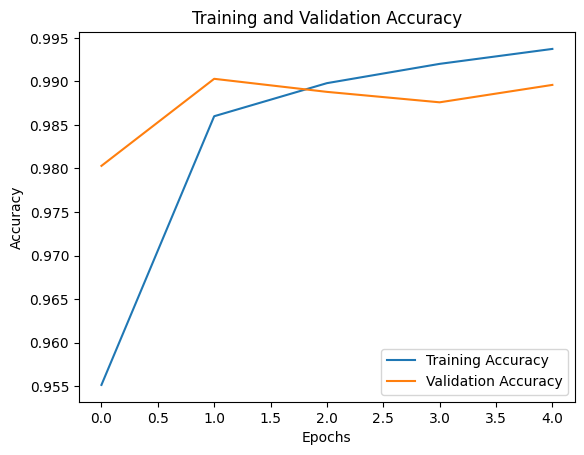

In [18]:
import matplotlib.pyplot as plt

# Plot accuracy over epochs
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

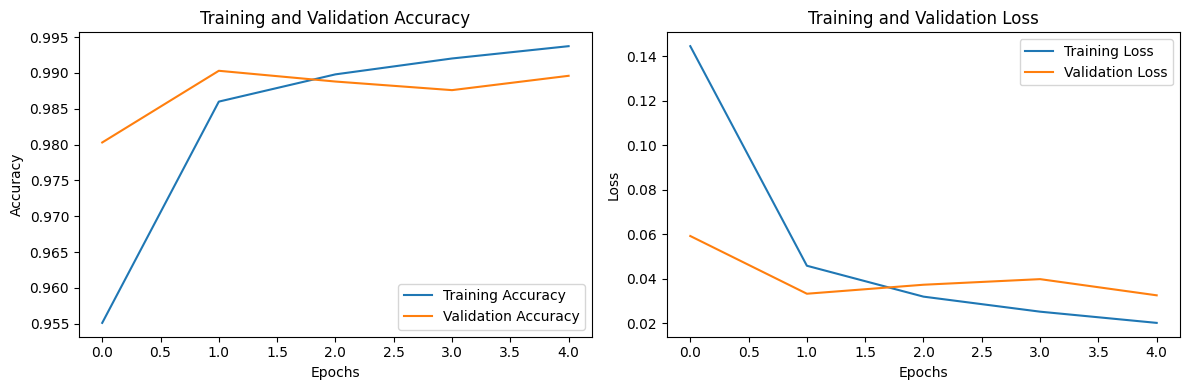

In [19]:
import matplotlib.pyplot as plt

# Assuming train_acc, val_acc, train_loss, and val_loss contain the accuracy and loss values

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
